### 230528 하은서 필수과제3
- 과거 주가 데이터를 가지고 시계열 데이터 분석을 해주시는데, 트렌드를 보고 갑자기 상승하거나, 하락하는 경우가 있을 것
- 단순한 재무적 정보가 아니라 비재무적인 정보들도 서칭하셔서 왜 그런식의 트렌드가 반영되었는지 같이 확인하면 좋을 것
- dart 재무적정보 확인 가능, 네이버 금융기사 리서치해도 충분히 다 나온다.

In [1]:
# import necessary libraries
import FinanceDataReader as fdr
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

Importing plotly failed. Interactive plots will not work.


In [2]:
kr = fdr.StockListing('KRX')
kr

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72800,1,100,0.14,73100,73400,72700,7404431,541165054600,434600169640000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,551000,1,4000,0.73,548000,561000,547000,147228,81480993000,128934000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115800,1,1500,1.31,115200,117400,114500,2653348,306892993500,84302673867000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,750000,1,8000,1.08,741000,755000,741000,21581,16171561000,53380500000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60400,2,-100,-0.17,60600,60700,60300,360365,21821244700,49702356680000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1599,2,-1,-0.06,1400,1599,1360,21,29199,2526356040,1579960,KNX
2724,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,2,-1,-1.96,51,51,49,25053,1272213,1907350000,38147000,KNX
2725,322190,KR7322190000,베른,KONEX,일반기업부,176,1,22,14.29,176,176,154,3,506,1570834672,8925197,KNX
2726,000547,KR7000542001,흥국화재2우B,KOSPI,,9600,1,680,7.62,9900,10040,9200,25947,252181500,1474560000,153600,STK


In [4]:
kr.query('Name=="하이브"')
h = fdr.DataReader('352820')
h

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-06-23,307000,308500,297500,301000,246155,-0.019544
2023-06-26,299000,303500,296000,298000,125709,-0.009967
2023-06-27,298500,298500,285500,292000,289388,-0.020134


In [5]:
dic = { 'ds' : h.index,
       'y' : h.Close}

In [6]:
h_df = pd.DataFrame(dic)
h_df

,ds,y
Date,,
2020-10-15,2020-10-15,255420
2020-10-16,2020-10-16,198495
2020-10-19,2020-10-19,187110
2020-10-20,2020-10-20,180675
2020-10-21,2020-10-21,177210
...,...,...
2023-06-23,2023-06-23,301000
2023-06-26,2023-06-26,298000
2023-06-27,2023-06-27,292000


In [7]:
h_df.reset_index(inplace=True)

del h_df['Date']

<Axes: xlabel='ds'>

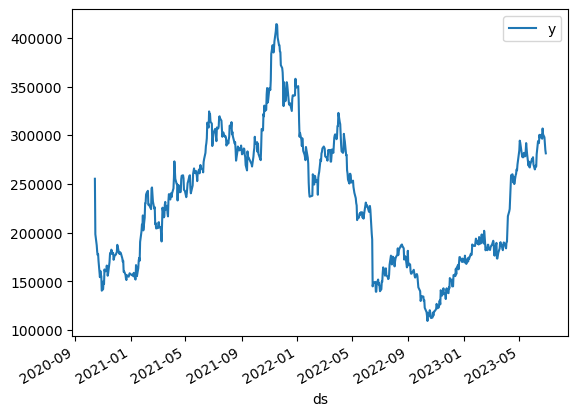

In [8]:
h_df.plot('ds')

- 2023년 1월~4월에는 변동 추이가 거의5 없지만, 5월에 갑자기 주가가 상승하는 것을 볼 수 있다.

In [21]:
hy = fdr.DataReader('352820','2023-01-01','2023-05-31')
hy

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,174500,176000,166500,169500,183432,-0.023055
2023-01-03,170000,182000,170000,176500,522683,0.041298
2023-01-04,176500,177000,169000,171500,251334,-0.028329
2023-01-05,172000,177000,171000,172000,173260,0.002915
2023-01-06,170000,172000,160500,168000,509214,-0.023256
...,...,...,...,...,...,...
2023-05-24,278000,278500,263500,267500,309525,-0.020147
2023-05-25,263000,272000,262500,267000,183552,-0.001869
2023-05-26,264500,272000,263000,270000,192873,0.011236


<Axes: xlabel='Date'>

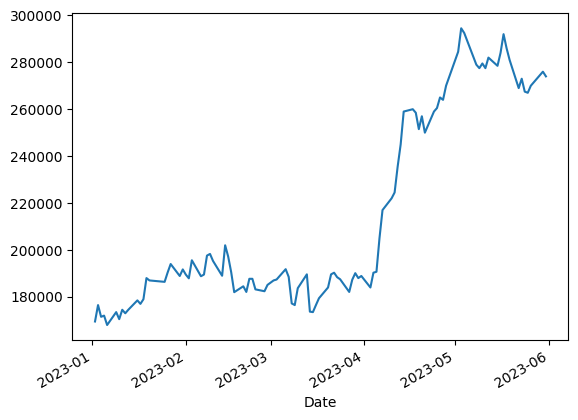

In [22]:
hy['Close'].plot()

- <관련기사>
https://www.cstimes.com/news/articleView.html?idxno=540432
http://theviewers.co.kr/View.aspx?No=2795017 <br>
하이브가 올해 2월 SM을 인수하기 위해 경영원 분쟁으로 인해 주가가 19만원선을 넘지 못 한 것을 확인할 수 있다. 하지만 4월 초 ' BTS 지민'이 미국 빌보드 메인 싱글 차트 핫 100에서 1위를 차지하면서 주가가 급등하였다.<br> BTS 지민의 군 복무에 다른 멤버들의 솔로 활동과 세븐틴, 뉴진스, 르세라핌 등 신보 판매량이 기대치를 넘어서면서 주가는 더욱 급등한 것을 볼 수 있다.



-  <관련기사> https://www.businesspost.co.kr/BP?command=article_view&num=313147 <br>올해 5월 하이브에서 새로 데뷔하는 보이그룹과 미국에서 준비 중인 현지 걸그룹도 예정되어 있어 시장의 높은 관심도 주가 상승에 영향을 준 것으로 예상된다.